In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats


In [2]:
data_df = pd.read_csv('games.csv', index_col= False)

In [3]:
data_df.columns = [
    'Game_ID',                # id
    'Rated_(T/F)',             # rated
    'Start_Time',              # created_at
    'End_Time',                # last_move_at
    'Number_of_Turns',         # turns
    'Game_Status',             # victory_status
    'Winner',                  # winner
    'Time_Increment',          # increment_code
    'White_Player-ID',         # white_id
    'White_Player_Rating',     # white_rating
    'Black_Player_ID',         # black_id
    'Black_Player_Rating',     # black_rating
    'All_Moves_in_Standard_Chess_Notation',  # moves
    'Opening_Eco',  # opening_eco
    'Opening_Name',            # opening_name
    'Opening_Ply'  # opening_ply
]

In [4]:
data_df.shape

(20058, 16)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Game_ID                               20058 non-null  object 
 1   Rated_(T/F)                           20058 non-null  bool   
 2   Start_Time                            20058 non-null  float64
 3   End_Time                              20058 non-null  float64
 4   Number_of_Turns                       20058 non-null  int64  
 5   Game_Status                           20058 non-null  object 
 6   Winner                                20058 non-null  object 
 7   Time_Increment                        20058 non-null  object 
 8   White_Player-ID                       20058 non-null  object 
 9   White_Player_Rating                   20058 non-null  int64  
 10  Black_Player_ID                       20058 non-null  object 
 11  Black_Player_Ra

In [6]:
data_df.isnull().sum()

Game_ID                                 0
Rated_(T/F)                             0
Start_Time                              0
End_Time                                0
Number_of_Turns                         0
Game_Status                             0
Winner                                  0
Time_Increment                          0
White_Player-ID                         0
White_Player_Rating                     0
Black_Player_ID                         0
Black_Player_Rating                     0
All_Moves_in_Standard_Chess_Notation    0
Opening_Eco                             0
Opening_Name                            0
Opening_Ply                             0
dtype: int64

In [7]:
outliers = pd.DataFrame(columns=data_df.columns)

for column in data_df.select_dtypes(include=[float, int]).columns:
    z_scores = stats.zscore(data_df[column])
    # Store outliers based on z-score threshold
    outliers[column] = data_df[column][(z_scores > 4) | (z_scores < -4)]

outlier_counts = outliers.notnull().sum()
print(outlier_counts)


Game_ID                                  0
Rated_(T/F)                              0
Start_Time                               0
End_Time                                 0
Number_of_Turns                         31
Game_Status                              0
Winner                                   0
Time_Increment                           0
White_Player-ID                          0
White_Player_Rating                      0
Black_Player_ID                          0
Black_Player_Rating                      0
All_Moves_in_Standard_Chess_Notation     0
Opening_Eco                              0
Opening_Name                             0
Opening_Ply                              0
dtype: int64


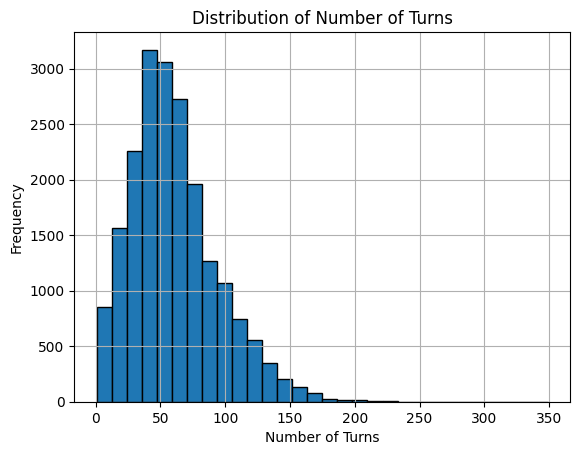

In [8]:
data_df['Number_of_Turns'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Number of Turns')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.show()

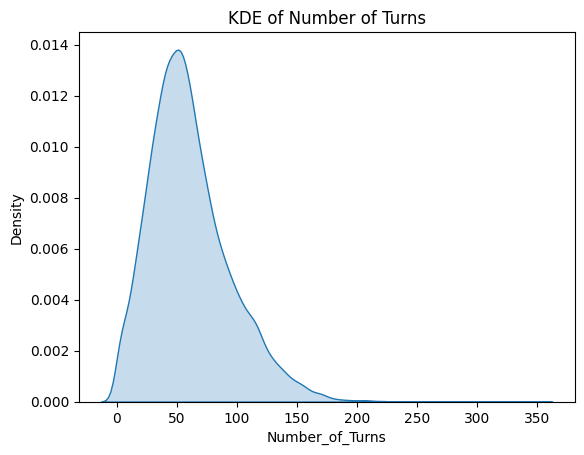

In [9]:
sns.kdeplot(data_df['Number_of_Turns'], fill=True)
plt.title('KDE of Number of Turns')
plt.show()

In [10]:
from scipy.stats import skew, kurtosis

skewness = skew(data_df['Number_of_Turns'])
kurt = kurtosis(data_df['Number_of_Turns'])

print('Skewness:', skewness)
print('Kurtosis:', kurt)

Skewness: 0.89721666835643
Kurtosis: 1.3845162919776515


In [11]:
data_df['Number_of_Turns'] = mstats.winsorize(data_df['Number_of_Turns'], limits=[0.05, 0.05])



In [12]:
# Show Ouliers again.
utliers = pd.DataFrame(columns=data_df.columns)

for column in data_df.select_dtypes(include=[float, int]).columns:
    z_scores = stats.zscore(data_df[column])
    # Store outliers based on z-score threshold
    outliers[column] = data_df[column][(z_scores > 4) | (z_scores < -4)]

outlier_counts = outliers.notnull().sum()
print(outlier_counts)

Game_ID                                 0
Rated_(T/F)                             0
Start_Time                              0
End_Time                                0
Number_of_Turns                         0
Game_Status                             0
Winner                                  0
Time_Increment                          0
White_Player-ID                         0
White_Player_Rating                     0
Black_Player_ID                         0
Black_Player_Rating                     0
All_Moves_in_Standard_Chess_Notation    0
Opening_Eco                             0
Opening_Name                            0
Opening_Ply                             0
dtype: int64


In [16]:
data_df.to_csv("Clean_Chess_Data.csv",index =0)

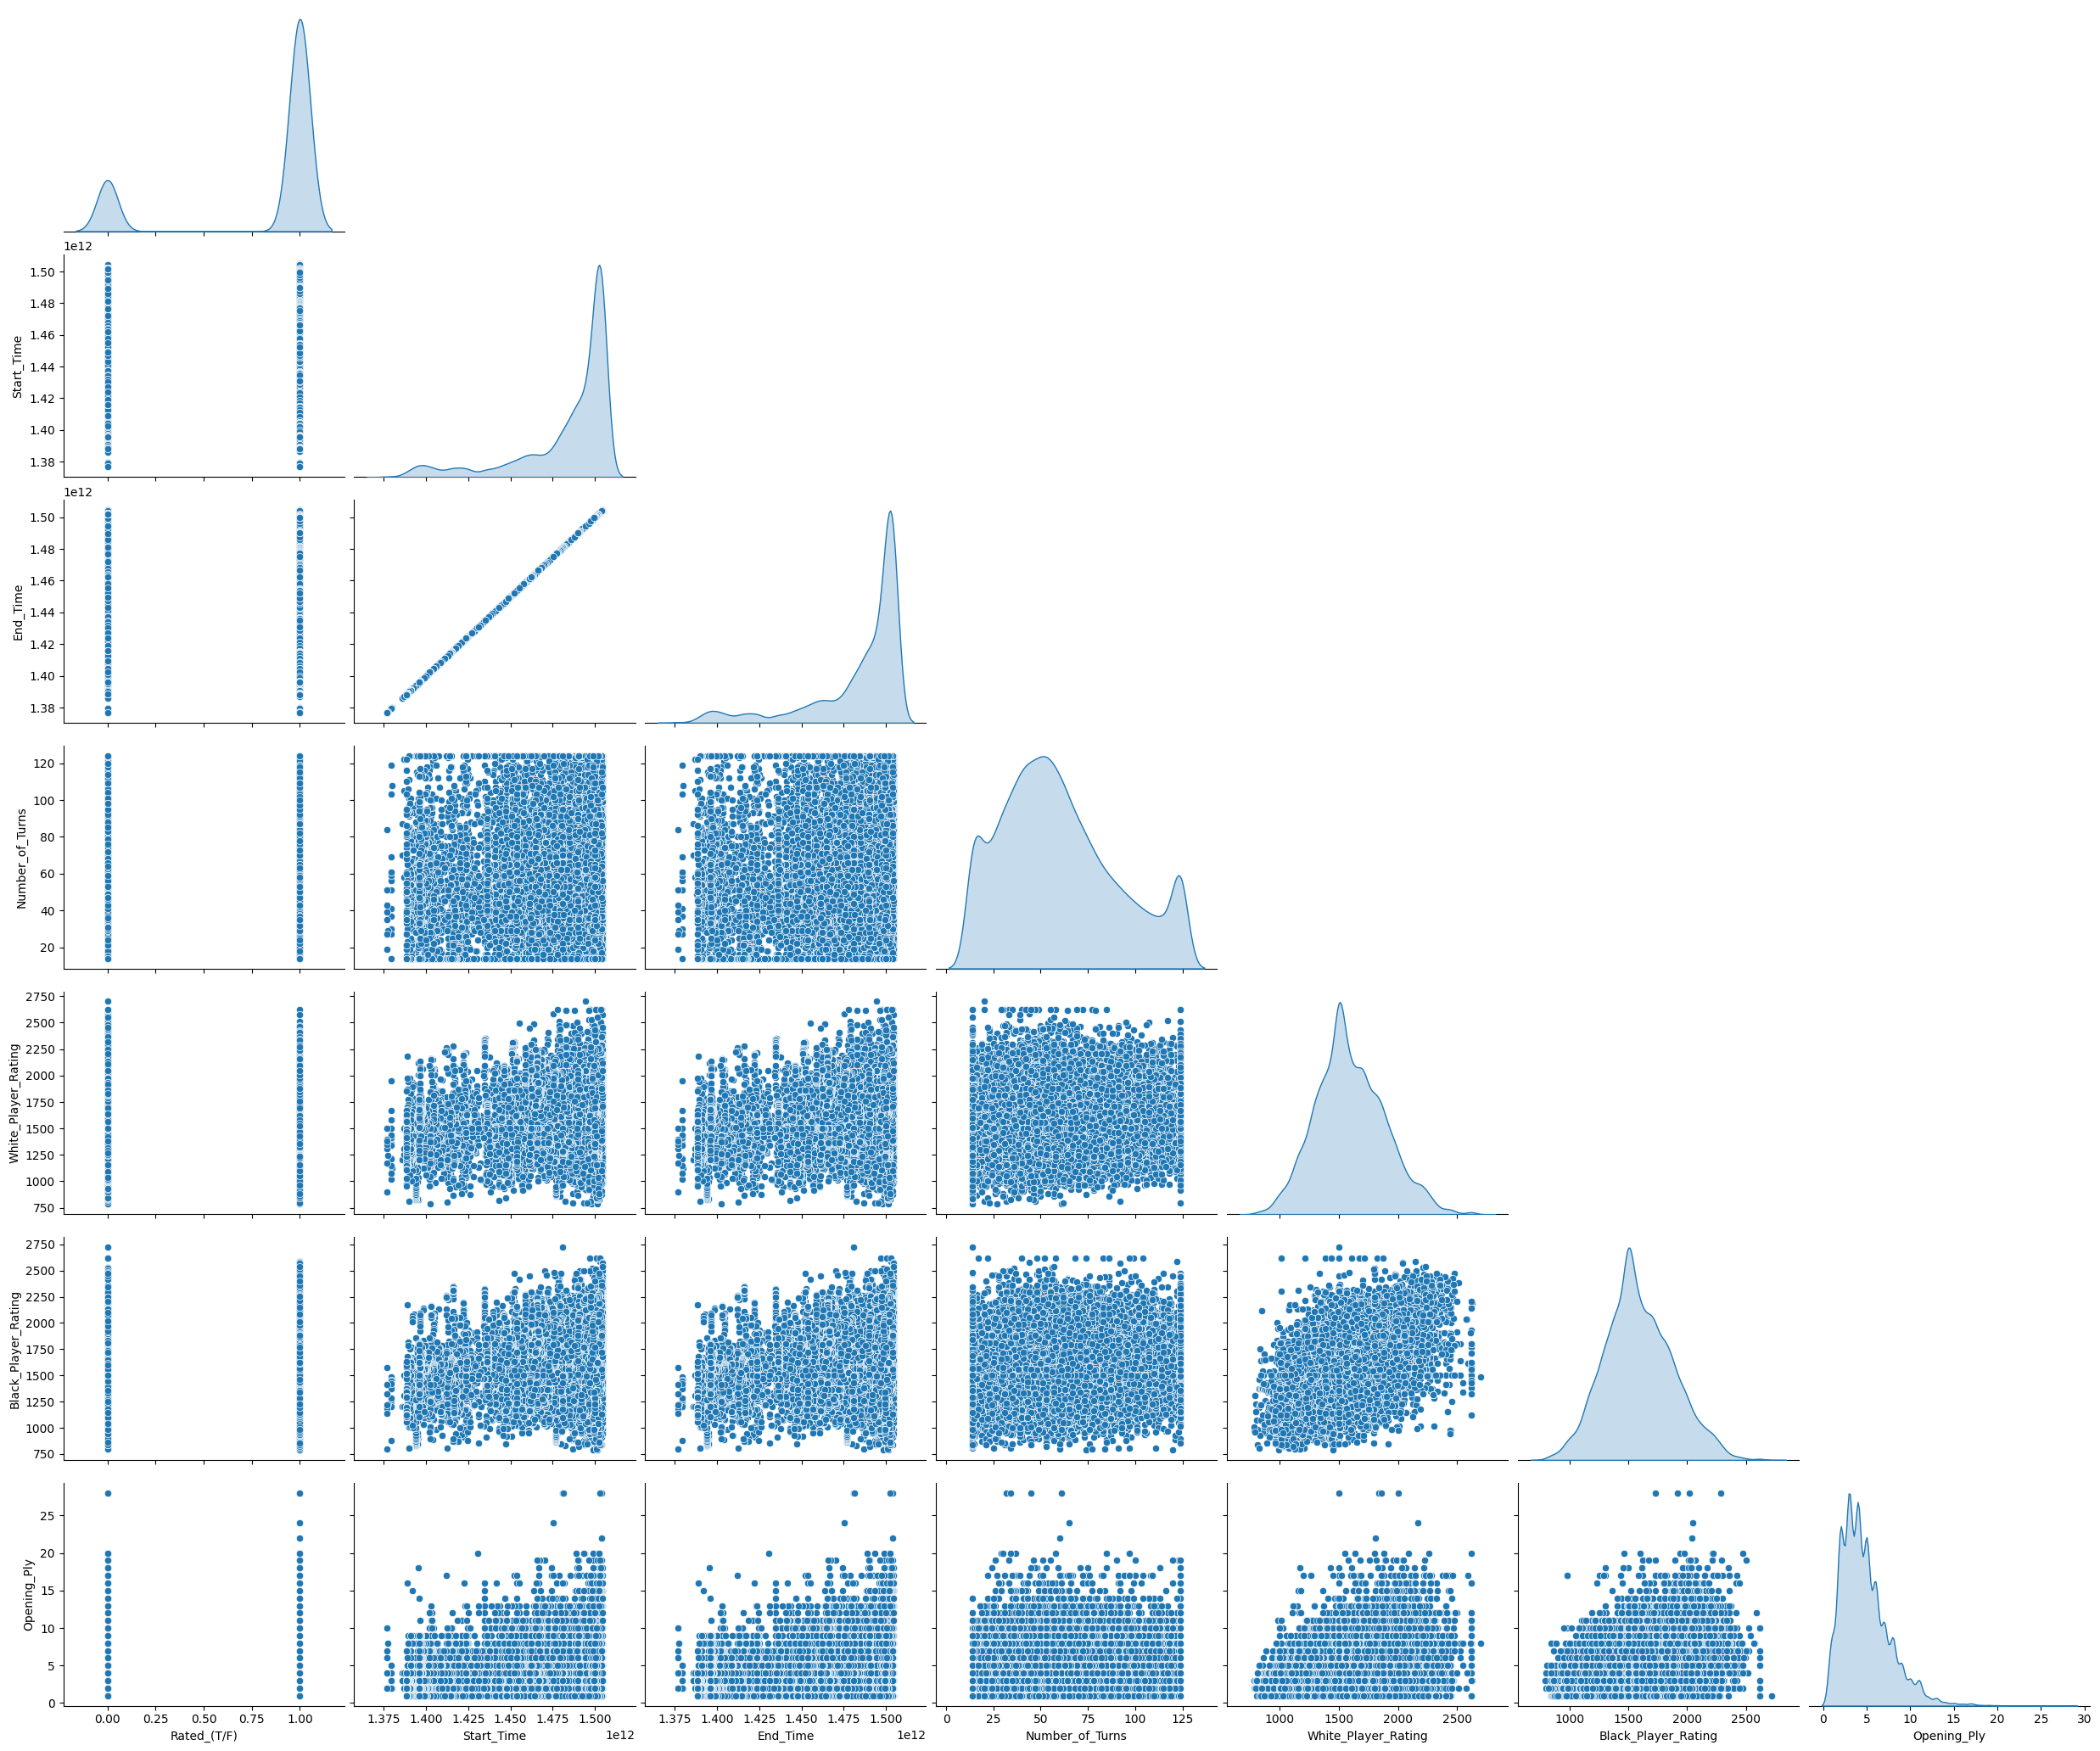

In [14]:
sns.pairplot(data_df, 
             kind='scatter', 
             diag_kind='kde', 
             height=3, 
             aspect=1.2, 
             corner=True)
plt.show()


# Encoding